In [1]:
import pandas as pd

file_path = 'C:\\Users\\santi\\Documents\\Challenge-Engineer-SegundaParte-Python-y-APIs-1\\CSV\\casco_ls2_cascos_mac_cascos_agv.csv'
df = pd.read_csv(file_path)

df.head()


,item_id,title,price,currency_id,condition,available_quantity,seller_id,seller_reputation,location,url
0,MLA1771657248,Casco Moto Ls2 352 Rookie Negro + Spoiler Cuot...,176239.0,ARS,new,92125,90743243,No Reputation,Capital Federal,https://articulo.mercadolibre.com.ar/MLA-17716...
1,MLA1108983365,Casco Integral Moto Ls2 352 Rookie Solid Negro...,169460.0,ARS,new,1418,145640161,No Reputation,Capital Federal,https://articulo.mercadolibre.com.ar/MLA-11089...
2,MLA1412293731,Casco Ls2 Rebatible 370 Stripe Doble Visor Fas...,352800.0,ARS,new,28,44012389,No Reputation,Buenos Aires,https://articulo.mercadolibre.com.ar/MLA-14122...
3,MLA1734206362,Casco Ls2 352 Rookie Negro Mate Con Spoiler En...,178370.0,ARS,new,152,349875216,No Reputation,Santa Fe,https://articulo.mercadolibre.com.ar/MLA-17342...
4,MLA1364791813,Casco Para Moto Integral Ls2 Rookie Ff352 Negr...,169460.0,ARS,new,62,89575112,No Reputation,Capital Federal,https://articulo.mercadolibre.com.ar/MLA-13647...


In [69]:
description = df.describe()


description = description.applymap(lambda x: f"{x:,.0f}")


price_dtype = df['price'].dtype
missing_values = df.isnull().sum()


print("Valores faltantes:")
print(missing_values)
print("Estadísticas descriptivas:")
print(description)



Valores faltantes:
item_id               0
title                 0
price                 0
currency_id           0
condition             0
available_quantity    0
seller_id             0
seller_reputation     0
location              0
url                   0
dtype: int64
Estadísticas descriptivas:
           price available_quantity      seller_id
count      1,384              1,384          1,384
mean     382,050              1,109    221,760,401
std      332,627              7,192    316,258,470
min        2,997                  1         85,564
25%      192,560                  3     75,674,008
50%      277,034                 10     99,236,289
75%      419,979                 30    212,475,070
max    2,908,000            100,976  1,989,261,420


C:\Users\santi\AppData\Local\Temp\ipykernel_13784\3494027102.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  description = description.applymap(lambda x: f"{x:,.0f}")


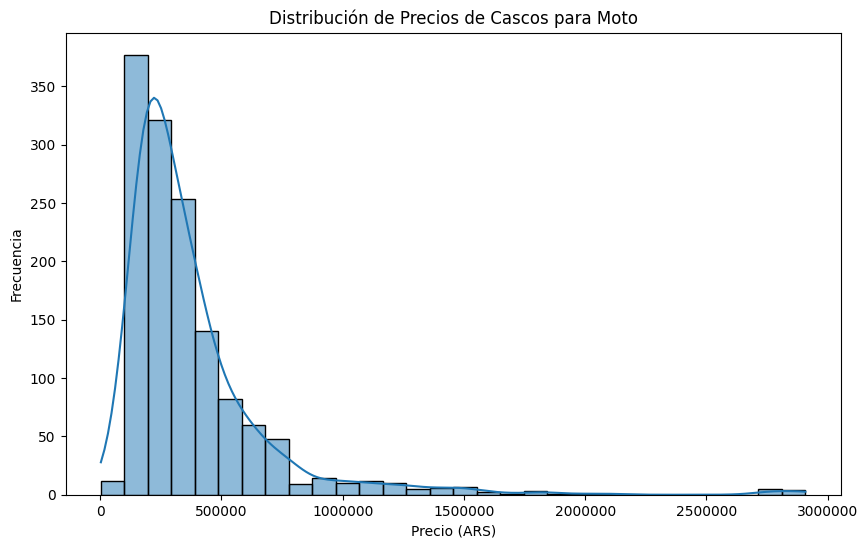

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribución de Precios de Cascos para Moto')
plt.xlabel('Precio (ARS)')
plt.ylabel('Frecuencia')


plt.ticklabel_format(axis='x', style='plain')


plt.show()

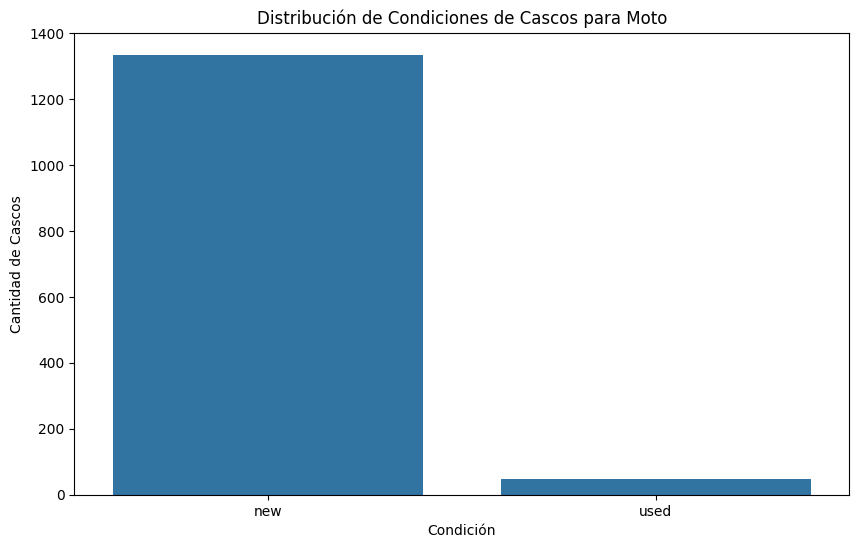

condition
new     1335
used      49
Name: count, dtype: int64

In [71]:

condition_counts = df['condition'].value_counts()


plt.figure(figsize=(10, 6))
sns.countplot(x='condition', data=df)
plt.title('Distribución de Condiciones de Cascos para Moto')
plt.xlabel('Condición')
plt.ylabel('Cantidad de Cascos')
plt.show()

condition_counts


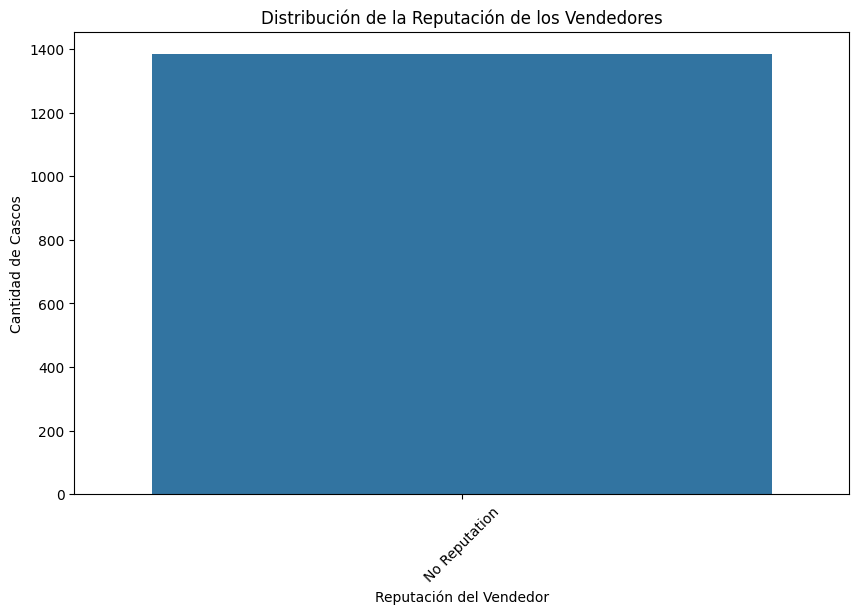

seller_reputation
No Reputation    1384
Name: count, dtype: int64

In [72]:

seller_reputation_counts = df['seller_reputation'].value_counts()


plt.figure(figsize=(10, 6))
sns.countplot(x='seller_reputation', data=df)
plt.title('Distribución de la Reputación de los Vendedores')
plt.xlabel('Reputación del Vendedor')
plt.ylabel('Cantidad de Cascos')
plt.xticks(rotation=45)  
plt.show()

seller_reputation_counts


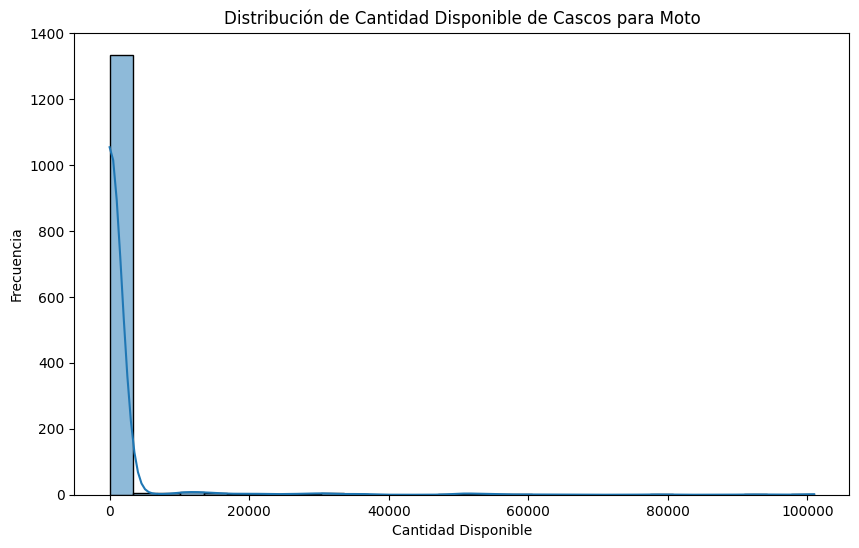

In [73]:

plt.figure(figsize=(10, 6))
sns.histplot(df['available_quantity'], bins=30, kde=True)
plt.title('Distribución de Cantidad Disponible de Cascos para Moto')
plt.xlabel('Cantidad Disponible')
plt.ylabel('Frecuencia')
plt.show()


In [74]:
brands = ['Ls2', 'Agv', 'Mac']


df['brand'] = df['title'].apply(lambda x: next((brand for brand in brands if brand in x), 'Other'))

df['brand'].value_counts()


brand
Ls2      968
Mac      262
Agv      132
Other     22
Name: count, dtype: int64

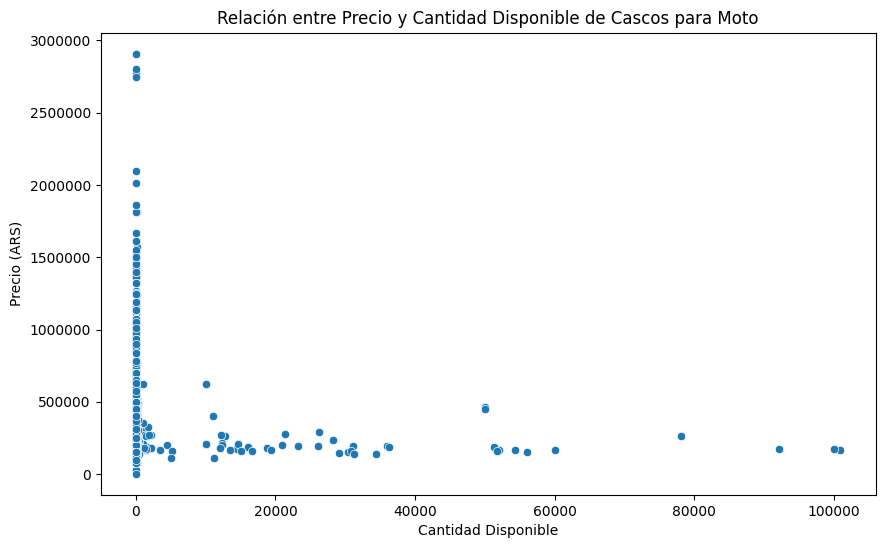

In [75]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='available_quantity', y='price', data=df)
plt.title('Relación entre Precio y Cantidad Disponible de Cascos para Moto')
plt.xlabel('Cantidad Disponible')
plt.ylabel('Precio (ARS)')
plt.ticklabel_format(axis='y', style='plain')

plt.show()

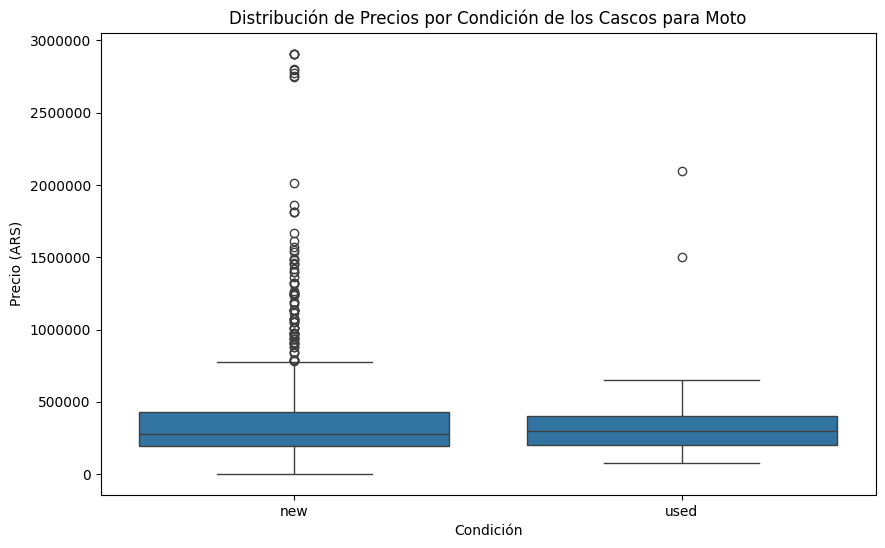

In [76]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='condition', y='price', data=df)
plt.title('Distribución de Precios por Condición de los Cascos para Moto')
plt.xlabel('Condición')
plt.ylabel('Precio (ARS)')
plt.ticklabel_format(axis='y', style='plain')

plt.show()


brand
Ls2      968
Mac      262
Agv      132
Other     22
Name: count, dtype: int64

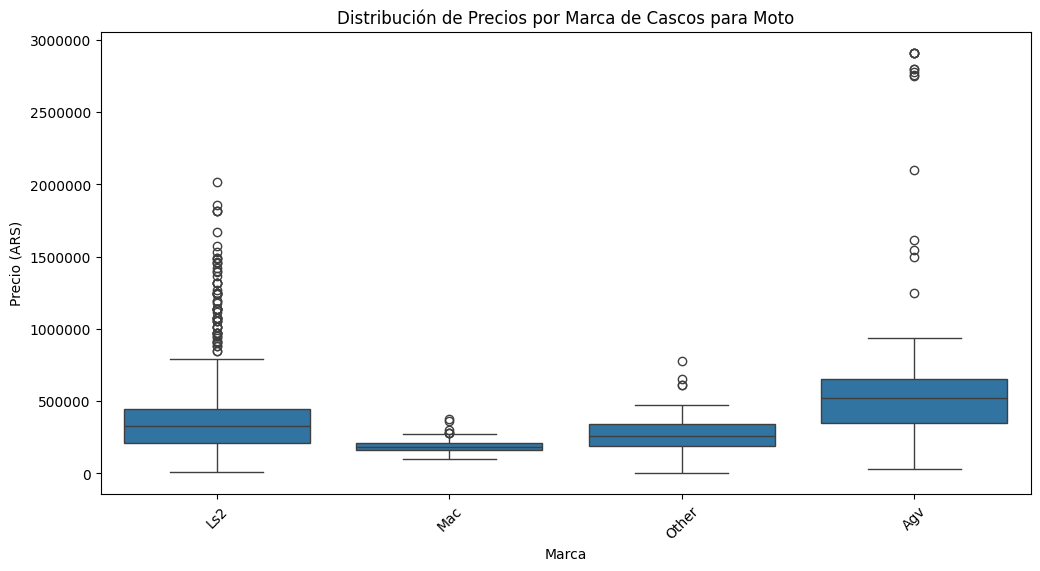

In [77]:

additional_brands = ['Ls2', 'Agv', 'Mac']


df['brand'] = df['title'].apply(lambda x: next((brand for brand in brands + additional_brands if brand in x), 'Other'))


brand_counts = df['brand'].value_counts()


plt.figure(figsize=(12, 6))
sns.boxplot(x='brand', y='price', data=df)
plt.title('Distribución de Precios por Marca de Cascos para Moto')
plt.xlabel('Marca')
plt.ylabel('Precio (ARS)')
plt.xticks(rotation=45) 
plt.ticklabel_format(axis='y', style='plain')

brand_counts


Matriz de correlación entre el precio y la cantidad disponible:
                       price  available_quantity
price               1.000000           -0.077666
available_quantity -0.077666            1.000000


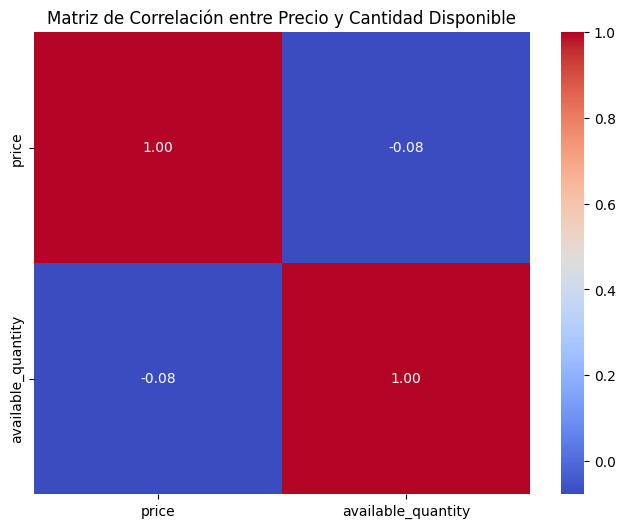

In [80]:


correlation_matrix = df[['price', 'available_quantity']].corr()


print("Matriz de correlación entre el precio y la cantidad disponible:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Matriz de Correlación entre Precio y Cantidad Disponible')
plt.show()
